In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###  Ensemble MSD

-> defintiion takes a directory as an argument and returns an ensemble df and a mean df.

-> calculate the squared distance for every position from t0 


In [48]:

def ensemble_msd(directory):

    distance_per_track = []
    
    def distance(x1, y1, x0, y0):
        msd = (x1 - x0)**2 + (y1- y0)**2
        return msd 

    
    for file in os.listdir(directory):

        if file.endswith("csv"):
            
            # join the directory and filename so you can read it

            file_path = os.path.join(directory, file)
            
            # read the csv file
            df = pd.read_csv(file_path)


            frame_0 = df[df['frame'] == 0]
            initial_x = frame_0['x_body'].mean()
            initial_y = frame_0['y_body'].mean()
        
            for track in df['track_id'].unique():
                
                track_unique = df[df['track_id'] == track]
            
            
                for i, row in track_unique.iterrows():
                    
                    
                    frame = row['frame']
                    x = row['x_body']
                    y = row['y_body']
                
                    msd = distance(x, y, initial_x, initial_y) 
                   
            
                    distance_per_track.append((track, frame, msd))  

            
    ensemble_df = pd.DataFrame(distance_per_track, columns=['track_id', 'frame', 'msd']) 

    mean_ensemble = ensemble_df.groupby('frame')['msd'].mean().reset_index()

    return ensemble_df, mean_ensemble




AGAROSE:

In [50]:
ensemble_df, mean_ensemble = ensemble_msd('/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/agarose-2')


FOOD:

In [106]:
ensem, mean = ensemble_msd("/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/food-2")

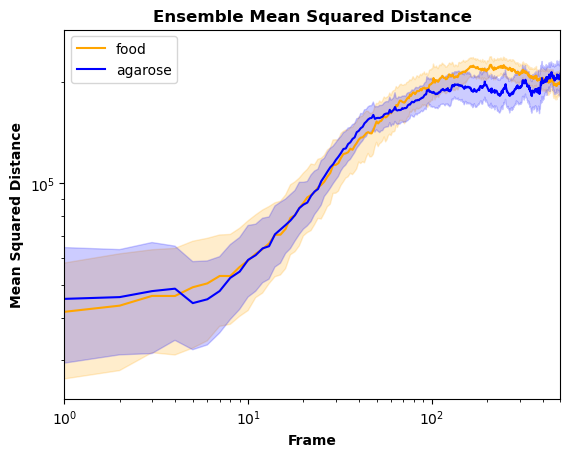

In [115]:
sns.lineplot(data=ensem, x='frame', y='displacement', color='orange', label='food')
sns.lineplot(data=ensemble_df, x='frame', y='displacement', color='blue', label='agarose')

plt.legend()

plt.xlim(1, 500)
plt.xscale('log')
plt.yscale('log')

plt.title('Ensemble Mean Squared Distance', fontweight='bold')


plt.ylabel('Mean Squared Distance', fontweight='bold')

plt.xlabel('Frame', fontweight='bold')


plt.savefig('/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/initial-plots/ensemble_msd_frames1-500_n10.png', bbox_inches='tight')
            
plt.show()


# is it linear or not -> 
# ensemble average for pairise distance over time 


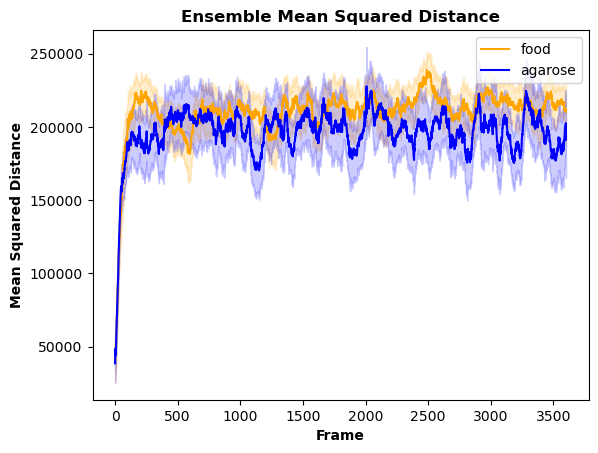

In [116]:
sns.lineplot(data=ensem, x='frame', y='displacement', color='orange', label='food')
sns.lineplot(data=ensemble_df, x='frame', y='displacement', color='blue', label='agarose')

plt.legend()

plt.title('Ensemble Mean Squared Distance', fontweight='bold')


plt.ylabel('Mean Squared Distance', fontweight='bold')

plt.xlabel('Frame', fontweight='bold')


plt.savefig('/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/initial-plots/ensemble_msd_n10.png', bbox_inches='tight')
            
plt.show()


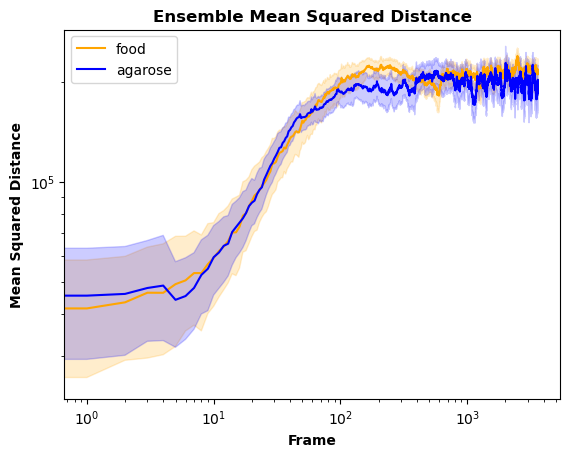

In [117]:
sns.lineplot(data=ensem, x='frame', y='displacement', color='orange', label='food')
sns.lineplot(data=ensemble_df, x='frame', y='displacement', color='blue', label='agarose')

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.title('Ensemble Mean Squared Distance', fontweight='bold')


plt.ylabel('Mean Squared Distance', fontweight='bold')

plt.xlabel('Frame', fontweight='bold')


plt.savefig('/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/initial-plots/ensemble_msd_log_n10.png', bbox_inches='tight')
            
plt.show()

dan:

In [98]:
frames_unique = np.unique(ensemble_df.frame)
msd = np.zeros_like(frames_unique,dtype=float)
msd_conf = np.zeros(shape=(2,len(frames_unique)),dtype=float)
# msd_uppconf = np.zeros_like(frames_unique,dtype=float)

for frameval in range(0,len(frames_unique)):
    # print(frameval,np.mean( np.array(ensemble_df[ensemble_df.frame == frames_unique[frameval]].displacement) ))
    print(np.mean( ensemble_df[ensemble_df.frame == frames_unique[frameval]].displacement) )
    msd[frameval] = np.mean( ensemble_df[ensemble_df.frame == frames_unique[frameval]].displacement )
    msd_conf[0,frameval] = np.quantile(ensemble_df[ensemble_df.frame == frames_unique[frameval]].displacement,q=0.05)
    msd_conf[1,frameval] = np.quantile(ensemble_df[ensemble_df.frame == frames_unique[frameval]].displacement,q=0.95)


msd

38587.79456039958
45475.98947338944
46027.39118603563
47948.28913572943
48752.88093814516
44179.8711938552
45351.71138054453
47971.76379403944
52499.910537268916
54786.33025300376
59339.55616942039
61291.36820078608
64185.33901395924
65149.55602088241
70655.93406399341
73038.86489729337
75301.20163442983
77649.53748390557
80551.63723101007
84496.80245353462
86514.61142672089
87740.25171649171
91848.04256474959
94619.56575557138
96245.17957896576
101506.03952791552
104815.60831856102
108323.35642749905
111649.10299029853
113896.24986884903
117322.76930476644
119983.84227300268
122998.10101453256
126495.94196583676
126938.21534441845
130806.07347321723
132400.17255030436
135457.35272954026
136963.5249711883
141866.12630082315
143180.53913176194
145763.78210892392
147101.95519778028
150732.82517306608
152559.86516582547
154766.09655475686
156036.478693305
156306.06988426682
159624.7518354375
155313.59827444423
156240.4586641094
156418.73303731944
156244.80140237292
157043.25740504812
1577

array([ 38587.7945604 ,  45475.98947339,  46027.39118604, ...,
       201961.36481169, 202589.89671405, 191367.26773911])

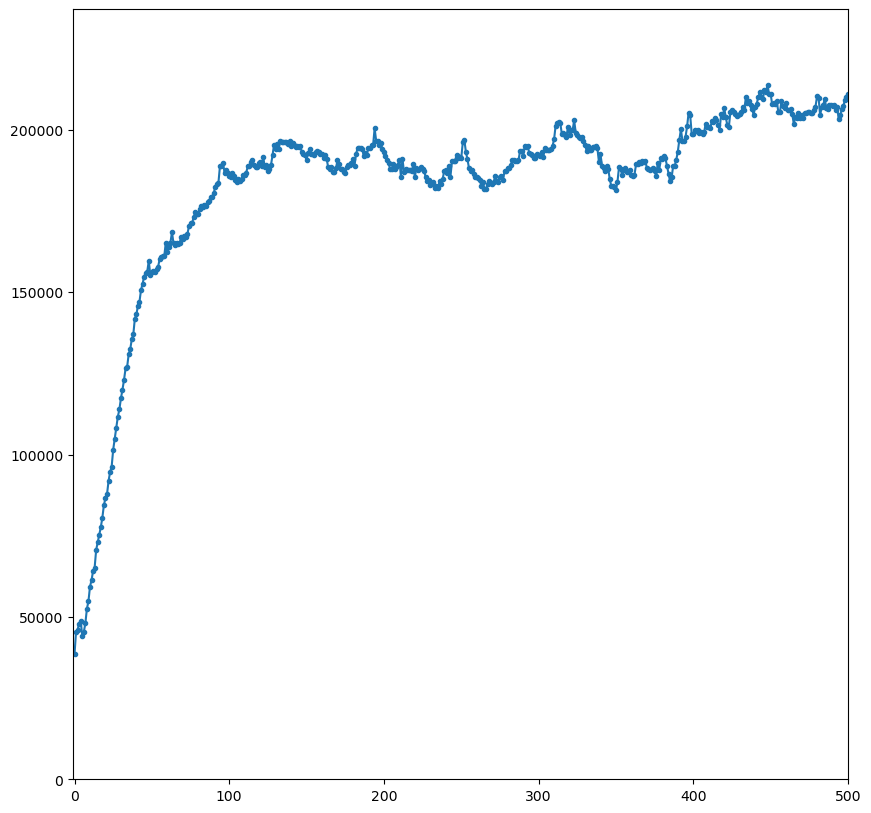

(3601,)
[174084.57786822 175708.96391078 176387.48849944 176093.71260665
 176896.2333114  176460.10159049 177733.49310796 178156.65600575
 179413.06613936 179320.50690337 180527.26746124 182499.69761863
 183450.33944251 183520.12121644 188750.73489865 188888.32801035
 189714.89849269 186822.15099361 187581.25683532 186637.33253845
 185789.01315207 185501.59757115 186799.04677349 185762.50042162
 184515.75998521 183839.99438704 184761.02303079 184110.29808364
 184809.2611967  186219.91015868 186059.63634818 186827.60564579
 188717.38530428 188878.70814735 190028.31553914 190625.88079587
 189005.34320642 188514.87401793 188570.34579791 189739.38864739
 190064.49966216 188868.60154225 191642.3988731  188401.50586415
 189261.37280104 187443.70600072 187876.97696414 189132.65845326
 192169.45934151 195443.85749649 194047.67089722 195741.34975242
 193989.95569681 196690.58754819 196377.12133058 196103.18899099
 196196.54233    196329.4664514  195681.1862115  196500.40926343
 194984.93092002 

In [102]:
# sns.lineplot(data=ensemble_df, x='frame', y='displacement')
plt.figure(figsize=(10,10))
plt.plot(frames_unique,msd,'.-')
# plt.errorbar(frames_unique,msd,yerr=msd_conf)
# # plt.plot(np.arange(2,20), 1e4* np.arange(2,20), 'r--')
# plt.xscale('log')
# plt.yscale('log')
plt.ylim(0)
plt.xlim(-1,500)

plt.show()

print(frames_unique.shape)
print(msd[80:500])